## Read in KDD99 Data Set

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from tensorflow.keras.utils import get_file
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise

print(path) 

C:\Users\sBumS\.keras\datasets\kddcup.data_10_percent.gz


In [2]:
df = pd.read_csv(path, header=None)
print('Read {} rows'.format(len(df)))

Read 494021 rows


In [3]:
# The CSV file has no column heads, so add them
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
              'num_failed_logins','logged_in','num_compromised','root_shell', 'su_attempted','num_root','num_file_creations','num_shells',
              'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
              'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
              'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
              'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome']

# displaying the contents
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Data Processing

In [4]:
# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True, axis=1)
df.shape

(494021, 42)

In [5]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97278
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

## Encoding numeric and text data

In [7]:
# Encode a numeric column as zscores
def encode_numeric_zscores(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd

# Encode text values to dummy variables(i.e. [1, 0, 0], [0, 1, 0], [0, 0, 1] for red, green, blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f'{name}-{x}'
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [8]:
# Encoding the feature vector
text_col = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', ]

for i in df.columns:
    if i not in text_col:
        if i != 'outcome':
            encode_numeric_zscores(df, i)
for x in text_col:
    encode_text_dummy(df, x)

In [9]:
df.dropna(inplace=True, axis=1)
df[0:5]

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0


In [10]:
df['protocol_type-tcp'].unique()

array([1, 0], dtype=uint8)

In [11]:
normal_mask = df['outcome'] =='normal.'
attack_mask = df['outcome'] != 'normal.'

df.drop('outcome', axis=1, inplace=True)

df_normal = df[normal_mask]
df_attack = df[attack_mask]

print(f'Normal count: {len(df_normal)}')
print(f'Attack count: {len(df_attack)}')

Normal count: 97278
Attack count: 396743


In [12]:
# This is the numeric feature vector, as it goes to the neural net
x_normal = df_normal.values
x_attack = df_attack.values

In [13]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(x_normal, test_size=0.3, random_state=12)

print(f'Normal train count: {len(x_normal_train)}')
print(f'Normal test count: {len(x_normal_test)}')

Normal train count: 68094
Normal test count: 29184


In [14]:
x_normal_train.shape, x_normal_test.shape

((68094, 120), (29184, 120))

In [15]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_normal_train = sc.fit_transform(x_normal_train)
x_normal_test = sc.fit_transform(x_normal_test)
x_normal = sc.fit_transform(x_normal)
x_attack = sc.fit_transform(x_attack)

KDD99 dataset doesn't include timestamps as a feature.
Consider simplest approach to making these datapoints into time-domain data.
i.e. to assume that each datapoint occurs at the timestep immediately after the previous datapoint.

In [16]:
x_normal_train = pd.DataFrame(x_normal_train)
x_normal_test = pd.DataFrame(x_normal_test)
x_attack = pd.DataFrame(x_attack)
x_normal = pd.DataFrame(x_normal)

In [19]:
# function to convert to time domain dataset
def create_dataset(X, time_steps):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

In [20]:
# reshape to [samples, time_steps, n_features]
TIME_STEPS = 1
Xnormal_train = create_dataset(x_normal_train, TIME_STEPS)
print(Xnormal_train.shape)

(68093, 1, 120)


In [22]:
Xnormal_test = create_dataset(x_normal_test, TIME_STEPS)
print(Xnormal_test.shape)

(29183, 1, 120)


In [23]:
Xattack = create_dataset(x_attack, TIME_STEPS)
print(Xattack.shape)

(396742, 1, 120)


In [24]:
Xnormal = create_dataset(x_normal, TIME_STEPS)
print(Xnormal.shape)

(97277, 1, 120)


## LSTM Autoencoder Model Architecture

In [26]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(Xnormal_train.shape[1], Xnormal_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.RepeatVector(n=Xnormal_train.shape[1]))
model.add(keras.layers.LSTM(units=32, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=Xnormal_train.shape[2])))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                47360     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 120)            3960      
Total params: 63,736
Trainable params: 63,736
Non-trainable params: 0
__________________________________________________

## LSTM Autoencoder Model Training

In [27]:
history = model.fit(
    Xnormal_train, Xnormal_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/15
426/426 [==============================] - 8s 18ms/step - loss: 0.1053 - accuracy: 0.2498 - val_loss: 0.0621 - val_accuracy: 0.2980
Epoch 2/15
426/426 [==============================] - 5s 11ms/step - loss: 0.0646 - accuracy: 0.3363 - val_loss: 0.0504 - val_accuracy: 0.3240
Epoch 3/15
426/426 [==============================] - 5s 11ms/step - loss: 0.0589 - accuracy: 0.3553 - val_loss: 0.0473 - val_accuracy: 0.2929
Epoch 4/15
426/426 [==============================] - 5s 11ms/step - loss: 0.0561 - accuracy: 0.3619 - val_loss: 0.0463 - val_accuracy: 0.2988
Epoch 5/15
426/426 [==============================] - 5s 12ms/step - loss: 0.0538 - accuracy: 0.3615 - val_loss: 0.0452 - val_accuracy: 0.3015
Epoch 6/15
426/426 [==============================] - 5s 12ms/step - loss: 0.0521 - accuracy: 0.3727 - val_loss: 0.0448 - val_accuracy: 0.3317
Epoch 7/15
426/426 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.4181 - val_loss: 0.0435 - val_accuracy: 0.3863

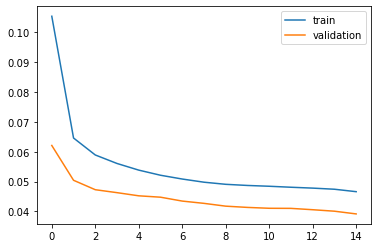

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

## Model Evaluation

In [29]:
X_train_pred = model.predict(Xnormal_train)

train_mae_loss = np.mean(np.abs(X_train_pred - Xnormal_train), axis=1)
train_mae_loss.shape

(68093, 120)

C:\Users\sBumS\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

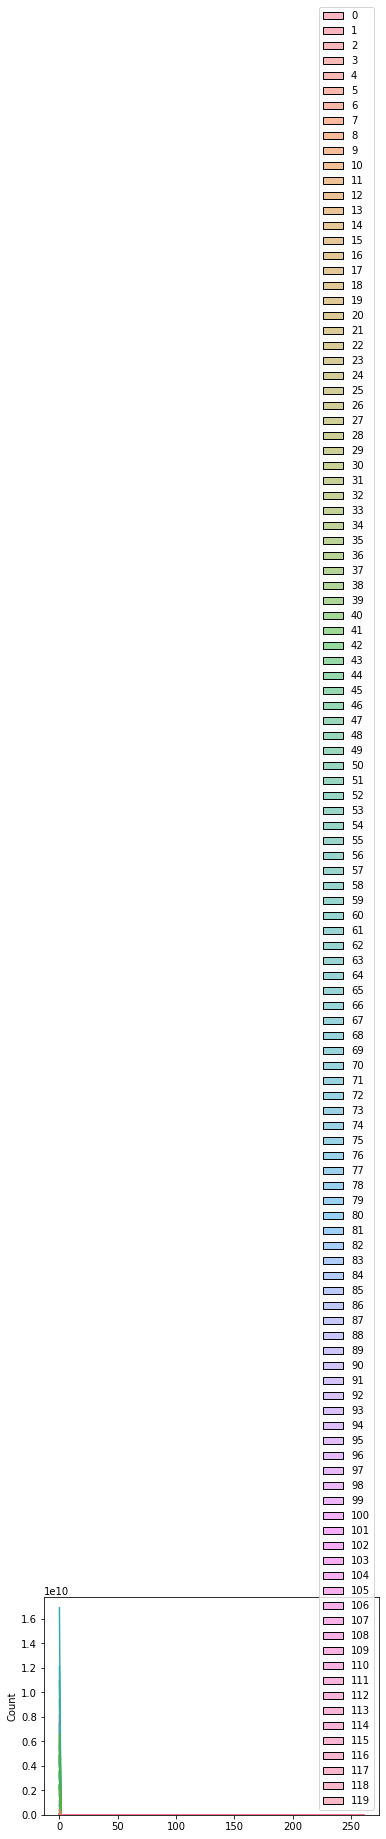

In [31]:
sns.histplot(train_mae_loss, bins=10, kde=True)